<div align="center"><h1> Binary Classification w/ Logistic Regression from Scratch </h1></div>
<div align="right">
<h5>Submitted by:</h5>
<div align=""><b>Mancy Saxena </b>
    50477980 </div>
</div>

In [246]:
## Import relevant libraries
##Import required libraries 
##(not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).

import pandas as pdaz3w
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random


In [301]:
#Read, preprocess, and print the main statistics about the dataset (you can reuse
##the code from Assignment 0 with a proper citation)


## Reading the data 
penguin_df = pd.read_csv("penguins.csv")


## preprocess

## 1. Removing null values

print(f'Initial number of nulls in the dataset : {penguin_df.isnull().values.sum()}')
penguin_df.dropna(axis=0, inplace=True)
print(f'New number of nulls in the dataset: {penguin_df.isnull().values.sum()} \n')


print("The stats of the numerical values are as follows:")


(penguin_df.describe())



Initial number of nulls in the dataset : 19
New number of nulls in the dataset: 0 

The stats of the numerical values are as follows:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [248]:
## Changing String valued columns to categorical values
print("Year ideally should not be a numerical value, will be pre process this")
print(penguin_df.columns)


penguin_df.dtypes


penguin_df['species'] = penguin_df.species.astype('category')
penguin_df['island'] = penguin_df.island.astype('category')
penguin_df['year'] = penguin_df.year.astype('category')
penguin_df['sex'] = penguin_df.sex.astype('category')
                    

Year ideally should not be a numerical value, will be pre process this
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


<h2> Normalizing the data </h2>

In [249]:
penguin_df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                 category
dtype: object

In [302]:
print(penguin_df.species.unique())
print(penguin_df.island.unique())
print(penguin_df.sex.unique())
print(penguin_df.year.unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female']
[2007 2008 2009]


In [251]:
penguin_normalized = penguin_df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].copy()

In [252]:
##performing normalization in float / non categorical values values

for column in penguin_normalized.columns:
    penguin_normalized[column] = (penguin_normalized[column] - penguin_normalized[column].min()) / (penguin_normalized[column].max() - penguin_normalized[column].min())    


In [253]:
penguin_normalized.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [254]:
penguin_df.drop(["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"], axis=1,inplace=True)

In [255]:
species_map = {'Adelie':1,'Gentoo':2,
            'Chinstrap':3}

island_map = {"Torgersen":1, "Biscoe":2, "Dream":3}
sex_map = {"male":0, "female":1}
year_map = {2007:1, 2008:2, 2009:3}

penguin_df['species'] = penguin_df['species'].map(species_map)
penguin_df['island'] = penguin_df['island'].map(island_map)
penguin_df['sex'] = penguin_df['sex'].map(sex_map)
penguin_df['year'] = penguin_df['year'].map(year_map)

In [256]:
penguin_df

,species,island,sex,year
0,1,1,0,1
1,1,1,1,1
2,1,1,1,1
4,1,1,1,1
5,1,1,0,1
...,...,...,...,...
339,3,3,0,3
340,3,3,1,3
341,3,3,0,3
342,3,3,0,3


In [257]:
for cols in penguin_normalized.columns:
    penguin_df = penguin_df.join(penguin_normalized[cols])

In [258]:
penguin_df.reset_index(drop=True)


,species,island,sex,year,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1,1,0,1,0.254545,0.666667,0.152542,0.291667
1,1,1,1,1,0.269091,0.511905,0.237288,0.305556
2,1,1,1,1,0.298182,0.583333,0.389831,0.152778
3,1,1,1,1,0.167273,0.738095,0.355932,0.208333
4,1,1,0,1,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...,...
328,3,3,0,3,0.861818,0.797619,0.593220,0.361111
329,3,3,1,3,0.414545,0.595238,0.508475,0.194444
330,3,3,0,3,0.636364,0.607143,0.355932,0.298611
331,3,3,0,3,0.680000,0.702381,0.644068,0.388889


<h2> Choosing the target Variable </h2>
Here I am choosing Target variable as "Sex" --> Male / Female making this a binary classification problem

In [259]:
def train_test_split(df, random_state=42):
    split_percent = 0.8
    random.seed(random_state)
    
    train=df.sample(frac=split_percent,random_state=random_state).copy()
    test=df.drop(train.index).copy()
    
    train_x  = train.loc[:, train.columns != "sex"]
    train_y = train.loc[:, train.columns == "sex"]
    
    
    test_x  = test.loc[:, test.columns != "sex"]
    test_y = test.loc[:, test.columns == "sex"]
    
    train_x= train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)    

    return train_x.iloc[0:].values, train_y[["sex"]].iloc[0:].values, test_x.iloc[0:].values, test_y[["sex"]].iloc[0:].values
    
train_X, train_y, test_X, test_y = train_test_split(penguin_df)

In [383]:
class LogitRegression:
    
    def __init__(self, rate=0.001, iter_num=100000):
        ## default number of iterations is 10000 and the learning rate is 0.05
        self.rate = rate
        self.iter_num = iter_num
        self.wt, self.bias, self.cost_list= None, None,None
        
        
        
    def sigmoid(self,z):
        return 1/(1+math.e**(-z))
    
    def cost(self, X, y, sigmoid_score):
        N,d = X.shape
        
        cost_val =(1/N)*((-1*y*np.log(sigmoid_score)) - ((1-y)*np.log(1-sigmoid_score)))
 
        return cost_val
    
    def gradient_descent(self,X,y, sigmoid_score):
        N,d = X.shape
        
        XT = np.transpose(X)   ## dXN
        y_score = sigmoid_score - y
        delta_w = (1/N) * np.dot(XT, (y_score))
        delta_b = (1/N) * np.sum(y_score)  ##XT ==> dXN dimensions and NX1  ==>dX1
        
        return delta_w, delta_b
    
    def fit(self,X,y):
        random.seed(0)
    # This method performs the training.
        N,d = X.shape
        # Initialize weights
        ##W=np.zeros((1,d))  ##matrix of 1Xd
        W=np.random.uniform(0, 1, size=(1,d))
        WT = np.transpose(W)  ## dX1
        B=0.5  ##Initializing bias as 0.5 
        self.cost_list = []
        for i in range(self.iter_num): 
            Wt_X = np.dot(X,WT)  
            score = Wt_X + B   ## Nxd and dx1  
            sigmoid_score = self.sigmoid(score) ## y predicted at given cost and 
            updated_dw, updated_db = self.gradient_descent(X,y,sigmoid_score)  ##dXN of X and 1XN
            
            B=B-self.rate*updated_db
            WT=WT-self.rate*updated_dw
            
            if (i/10000).is_integer():
               
                cost_to_Add = self.cost(X, y, sigmoid_score)
                self.cost_list.append(np.sum(cost_to_Add))            
            
        
        self.wt = WT
        self.bias =B
            
        return self.wt, self.bias, self.cost_list
    def predict(self,X):
        N,d= X.shape
        y_hat = np.zeros((N,1))
        final_score = np.dot(X,self.wt)+self.bias  ##1Xd
        final_score_y = self.sigmoid(final_score)
        for idx,pred_vals in enumerate(final_score_y):
            if pred_vals[0] >= 0.5:
                y_hat[idx] = 1
            else:
                y_hat[idx] = 0 
        
        return y_hat
    
    def accuracy(self,Y_cal,Y_actual ):
        total_sample = Y_cal.shape[0]
        count=0
        for val1, val2 in zip(Y_cal, Y_actual):
            if val1[0] == val2[0]:
                count+=1
        return count/total_sample
                
        
    

In [384]:
##Make the LogitRegression model object


##This is default learning rate and iteration


model = LogitRegression()
wt,bi, loss_vals = model.fit(train_X, train_y)
#train_X, train_y, test_X, test_y 
y_pred = model.predict(test_X)
accuracy = model.accuracy(y_pred, test_y)
print(f"The accuracy is {accuracy*100:.2f}%")

The accuracy is 89.55%


In [385]:
model1 = LogitRegression(0.05,100000)
wt1,bi1, loss_vals1 = model1.fit(train_X, train_y)
#train_X, train_y, test_X, test_y 
y_pred1 = model1.predict(test_X)
accuracy1= model1.accuracy(y_pred1, test_y)
print(f"The accuracy is {accuracy1*100:.2f}%")

The accuracy is 95.52%


In [386]:
model2 = LogitRegression(0.005,100000)
wt2,bi2, loss_vals2 = model2.fit(train_X, train_y)
#train_X, train_y, test_X, test_y 
y_pred2 = model2.predict(test_X)
accuracy2=model2.accuracy(y_pred2, test_y)
print(f"The accuracy is {accuracy2*100:.2f}%")

The accuracy is 94.03%


In [387]:
##Final Weights for each model :
print(f"Weights with default lr and iterations \n {wt} and\n bias is {bi:.5f}")
print("\n")
print(f"Weights with lr =0.05 and iterations = 10000 \n{wt1} and\n bias is {bi1:.5f}")
print("\n")
print(f"Weights with lr = 0.005 and iterations =10000 \n {wt2} and\n bias is {bi2:.5f}")

Weights with default lr and iterations 
 [[ 0.56877093]
 [ 0.17168419]
 [ 0.26811323]
 [-1.73520599]
 [-2.77976051]
 [-1.40221791]
 [-1.92866969]] and
 bias is 1.51883


Weights with lr =0.05 and iterations = 10000 
[[  2.29062283]
 [ -0.44625142]
 [  0.07592737]
 [-10.94843022]
 [-15.03741183]
 [ -0.27251077]
 [-13.98303041]] and
 bias is 14.55981


Weights with lr = 0.005 and iterations =10000 
 [[ 1.25581639]
 [-0.07383143]
 [ 0.21697906]
 [-5.3365302 ]
 [-7.12901395]
 [-1.56023444]
 [-5.35263268]] and
 bias is 6.12287


In [390]:
every_10000th_iteration = [i for i in range(1,len(loss_vals2)+1)]
len(every_10000th_iteration)

10

Text(0, 0.5, 'Cost Value')

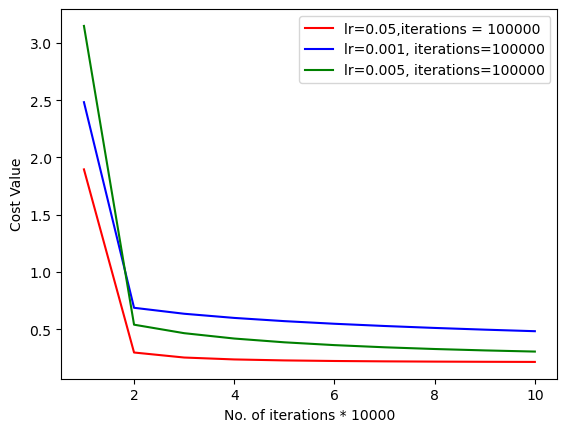

In [392]:
plt.plot(every_10000th_iteration, loss_vals1, color='r', label='lr=0.05,iterations = 100000')
plt.plot(every_10000th_iteration, loss_vals, color='b', label='lr=0.001, iterations=100000')
plt.plot(every_10000th_iteration, loss_vals2, color='g', label='lr=0.005, iterations=100000')

plt.legend(["lr=0.05,iterations = 100000", "lr=0.001, iterations=100000", "lr=0.005, iterations=100000"], loc ="upper right")

plt.xlabel("No. of iterations * 10000") 
plt.ylabel("Cost Value") 

In [405]:
model4 = LogitRegression(0.9,10000)
wt4,bi4, loss_vals4 = model4.fit(train_X, train_y)
#train_X, train_y, test_X, test_y 
y_pred4 = model4.predict(test_X)
accuracy4 = model4.accuracy(y_pred4, test_y)
print(f"The accuracy with 10000 iterations is  {accuracy4*100:.2f}%")


model5 = LogitRegression(0.9,20000)
wt5,bi5, loss_vals5 = model5.fit(train_X, train_y)
#train_X, train_y, test_X, test_y 
y_pred5 = model5.predict(test_X)
accuracy5 = model5.accuracy(y_pred5, test_y)
print(f"The accuracy is 20000 iterations is {accuracy5*100:.2f}%")


The accuracy with 10000 iterations is  94.03%
The accuracy is 20000 iterations is 92.54%


In [398]:
len(loss_vals5)

2

<b>REFERENCES</b>
<ol>
    
    - https://datatofish.com/check-nan-pandas-dataframe/ 
    - https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe 
    - https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical
    - https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
    - https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe
    - https://www.w3schools.com/python/ref_math_e.asp
    - https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
    - https://medium.com/analytics-vidhya/pandas-how-to-change-value-based-on-condition-fc8ee38ba529
    - https://sparkbyexamples.com/pandas/pandas-map-function-explained
    - https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
    - https://www.kdnuggets.com/2022/07/logistic-regression-work.html
    - https://www.datacamp.com/tutorial/understanding-logistic-regression-python
  
</ol>

In [ ]:
##getting best accuarcy for learning rate --> 0.0 and number of iterations --> 10000
best_wt, best_bias = wt1,bi1
best_score = {
    
    "weight":best_wt,
    "bias" : best_bias,
    "accuracy": accuracy1,
    "learning_rate" : 0.05,
    "iterations":100000
}

In [406]:
best_score

{'weight': array([[  2.29122914],
        [ -0.445885  ],
        [  0.07546481],
        [-10.95561228],
        [-15.03806034],
        [ -0.25830199],
        [-13.99686389]]),
 'bias': 14.561075166818854,
 'accuracy': 0.9552238805970149,
 'learning_rate': 0.05,
 'iterations': 100000}

In [407]:
with open('Mancy_Assignment1__assignment1_part_1.pickle', 'wb') as file:
    pickle.dump(best_score, file)

In [408]:
with open('Mancy_Assignment1__assignment1_part_1.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [411]:
print(b)

{'weight': array([[  2.29122914],
       [ -0.445885  ],
       [  0.07546481],
       [-10.95561228],
       [-15.03806034],
       [ -0.25830199],
       [-13.99686389]]), 'bias': 14.561075166818854, 'accuracy': 0.9552238805970149, 'learning_rate': 0.05, 'iterations': 100000}
